In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# Data Analysis & Feature Engineering

Load and Display Cleaned Data

In [6]:

# Load the cleaned dataset
df = pd.read_csv("../data/processed/smfdb_cleaned.csv")

# Display the first few rows
df.head()

,Tarih,Blokeslesmemiktari,Saatlikeslesmemiktari,Minalisfiyati,Maxalisfiyati,Minsatisfiyati,Maxsatisfiyati,Mineslesmefiyati,Maxeslesmefiyati,Talepislemhacmi,...,Adana_humidity,Gaziantep_temp,Gaziantep_humidity,Day/Night,Mevsim,Year,Month,Day,Hour,Is_Weekend
0,2019-01-01 00:00:00,0.002660,0.053589,0.001874,0.009862,0.013723,0.018571,0.012766,0.019864,0.011382,...,0.722222,0.255245,0.867347,0.0,1.0,2019,1,1,0,0
1,2019-01-01 01:00:00,0.004160,0.085383,0.001874,0.009822,0.021459,0.058158,0.019962,0.019872,0.010999,...,0.666667,0.270979,0.795918,0.0,1.0,2019,1,1,1,0
2,2019-01-01 02:00:00,0.005845,0.031826,0.015364,0.007919,0.009149,0.014724,0.008734,0.016022,0.009213,...,0.688889,0.270979,0.795918,0.0,1.0,2019,1,1,2,0
3,2019-01-01 03:00:00,0.006023,0.067099,0.000375,0.004222,0.000915,0.007234,0.000851,0.008542,0.005288,...,0.666667,0.277972,0.765306,0.0,1.0,2019,1,1,3,0
4,2019-01-01 04:00:00,0.005279,0.080496,0.000375,0.002722,0.001144,0.004195,0.001064,0.005507,0.002798,...,0.522222,0.270979,0.826531,0.0,1.0,2019,1,1,4,0


Check for Missing Values and Data Info

In [7]:
# Check if there are any remaining missing values
df.isnull().sum()

Tarih                        0
Blokeslesmemiktari           0
Saatlikeslesmemiktari        0
Minalisfiyati                0
Maxalisfiyati                0
Minsatisfiyati               0
Maxsatisfiyati               0
Mineslesmefiyati             0
Maxeslesmefiyati             0
Talepislemhacmi              0
Arzislemhacmi                0
Gerceklesendogalgaz          0
Gerceklesenbarajli           0
Gerceklesenlinyit            0
Gerceklesenakarsu            0
Gerceklesenithalkomur        0
Gerceklesenruzgar            0
Gerceklesengunes             0
Gerceklesenfueloil           0
Gerceklesenjeotermal         0
Gerceklesenasfaltitkomur     0
Gerceklesentaskomur          0
Gerceklesenbiyokutle         0
Gerceklesennafta             0
Gerceklesenlng               0
Gerceklesenuluslararasi      0
Gerceklesentoplam            0
Smf                          0
Ptf                          0
Ptfdolar                     0
Ptfeuro                      0
Dolar                        0
Euro    

In [8]:
# Check if there are any remaining missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [9]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40625 entries, 0 to 40624
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tarih                      40625 non-null  object 
 1   Blokeslesmemiktari         40625 non-null  float64
 2   Saatlikeslesmemiktari      40625 non-null  float64
 3   Minalisfiyati              40625 non-null  float64
 4   Maxalisfiyati              40625 non-null  float64
 5   Minsatisfiyati             40625 non-null  float64
 6   Maxsatisfiyati             40625 non-null  float64
 7   Mineslesmefiyati           40625 non-null  float64
 8   Maxeslesmefiyati           40625 non-null  float64
 9   Talepislemhacmi            40625 non-null  float64
 10  Arzislemhacmi              40625 non-null  float64
 11  Gerceklesendogalgaz        40625 non-null  float64
 12  Gerceklesenbarajli         40625 non-null  float64
 13  Gerceklesenlinyit          40625 non-null  flo

**Exploratory Data Analysis (EDA)**

**Univariate Analysis**

Basic Statistics of the Dataset

In [10]:
# Summary statistics
df.describe()

,Blokeslesmemiktari,Saatlikeslesmemiktari,Minalisfiyati,Maxalisfiyati,Minsatisfiyati,Maxsatisfiyati,Mineslesmefiyati,Maxeslesmefiyati,Talepislemhacmi,Arzislemhacmi,...,Adana_humidity,Gaziantep_temp,Gaziantep_humidity,Day/Night,Mevsim,Year,Month,Day,Hour,Is_Weekend
count,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,...,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000
mean,0.031440,0.134281,0.056985,0.125934,0.102165,0.314024,0.102516,0.250436,0.187824,0.192530,...,0.619225,0.534650,0.533099,0.500086,0.488566,2020.842412,6.225723,15.656295,11.497748,0.285883
std,0.021064,0.105139,0.095287,0.133826,0.131740,0.306702,0.125981,0.266216,0.211800,0.214996,...,0.233802,0.181449,0.245720,0.500006,0.376949,1.348193,3.389096,8.782695,6.921677,0.451840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,0.000000,0.000000
25%,0.015504,0.058054,0.000375,0.032268,0.025896,0.077148,0.033464,0.064802,0.047021,0.048248,...,0.444444,0.384615,0.336735,0.000000,0.000000,2020.000000,3.000000,8.000000,5.000000,0.000000
50%,0.026730,0.104815,0.018737,0.041333,0.061757,0.119701,0.060645,0.079640,0.068775,0.070633,...,0.644444,0.515734,0.500000,1.000000,0.333333,2021.000000,6.000000,16.000000,11.000000,0.000000
75%,0.043573,0.181623,0.077947,0.220437,0.114361,0.540803,0.116996,0.435051,0.285695,0.296684,...,0.822222,0.681818,0.744898,1.000000,1.000000,2022.000000,9.000000,23.000000,17.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2023.000000,12.000000,31.000000,23.000000,1.000000


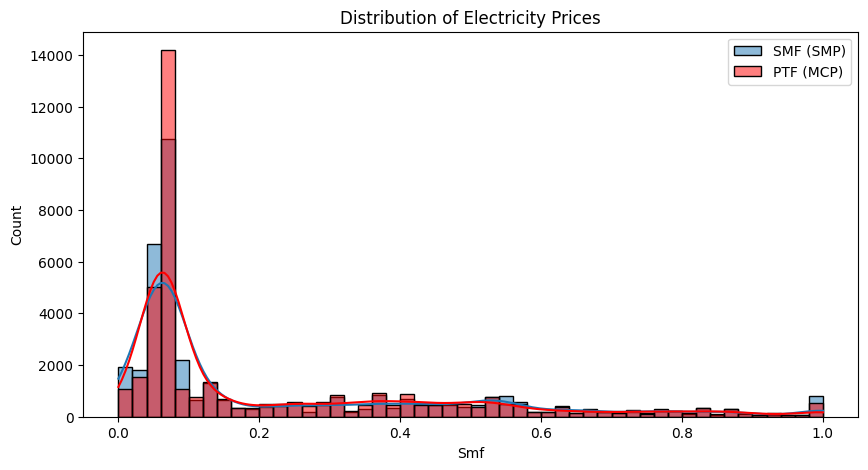

In [11]:
# Plot SMF & PTF price distributions
plt.figure(figsize=(10,5))
sns.histplot(df["Smf"], bins=50, kde=True, label="SMF (SMP)")
sns.histplot(df["Ptf"], bins=50, kde=True, label="PTF (MCP)", color="red")
plt.legend()
plt.title("Distribution of Electricity Prices")
plt.show()


Plot Electricity Prices Over Time

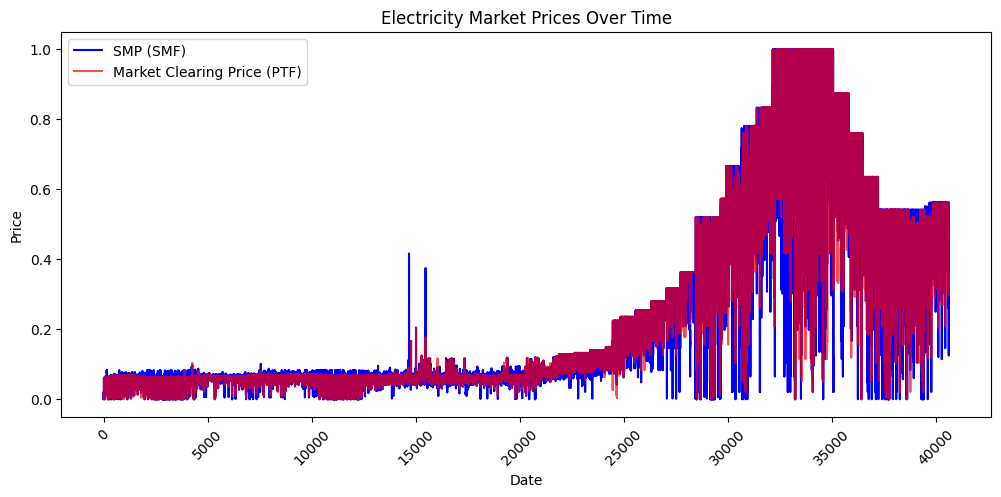

In [12]:
# HOURLY PRICES
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Smf"], label="SMP (SMF)", color="blue")
plt.plot(df.index, df["Ptf"], label="Market Clearing Price (PTF)", color="red", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Electricity Market Prices Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


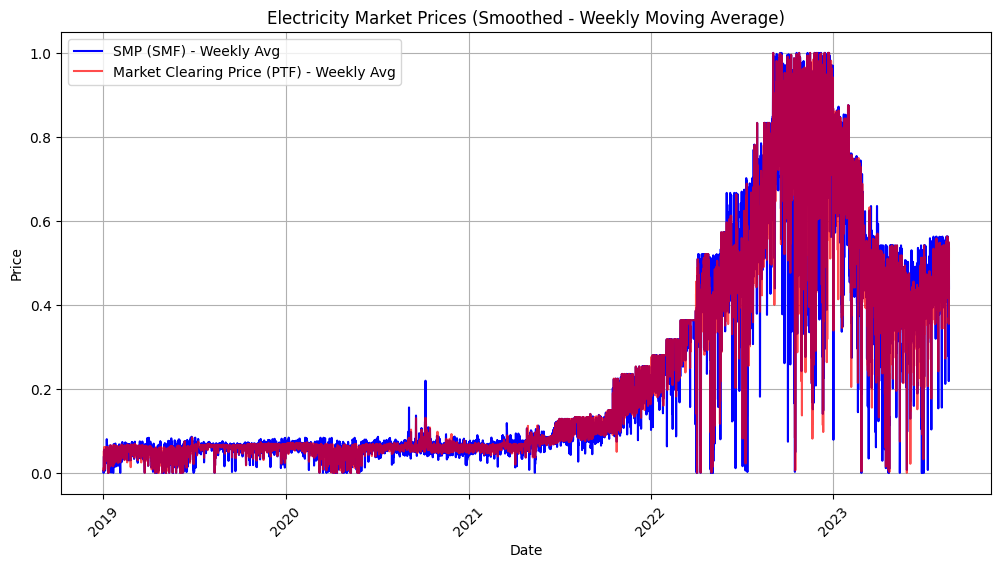

In [13]:
# WEEKLY MOVING AVERAGE
# Load dataset
df = pd.read_csv("../data/processed/smfdb_cleaned.csv", parse_dates=["Tarih"])

# Convert 'Tarih' to datetime and set as index
df["Tarih"] = pd.to_datetime(df["Tarih"])
df.set_index("Tarih", inplace=True)

# Calculate weekly moving average to smooth the graph
df["Smf_Weekly_Avg"] = df["Smf"].rolling(window=7).mean()
df["Ptf_Weekly_Avg"] = df["Ptf"].rolling(window=7).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Smf_Weekly_Avg"], label="SMP (SMF) - Weekly Avg", color="blue")
plt.plot(df.index, df["Ptf_Weekly_Avg"], label="Market Clearing Price (PTF) - Weekly Avg", color="red", alpha=0.7)

# Formatting
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Electricity Market Prices (Smoothed - Weekly Moving Average)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


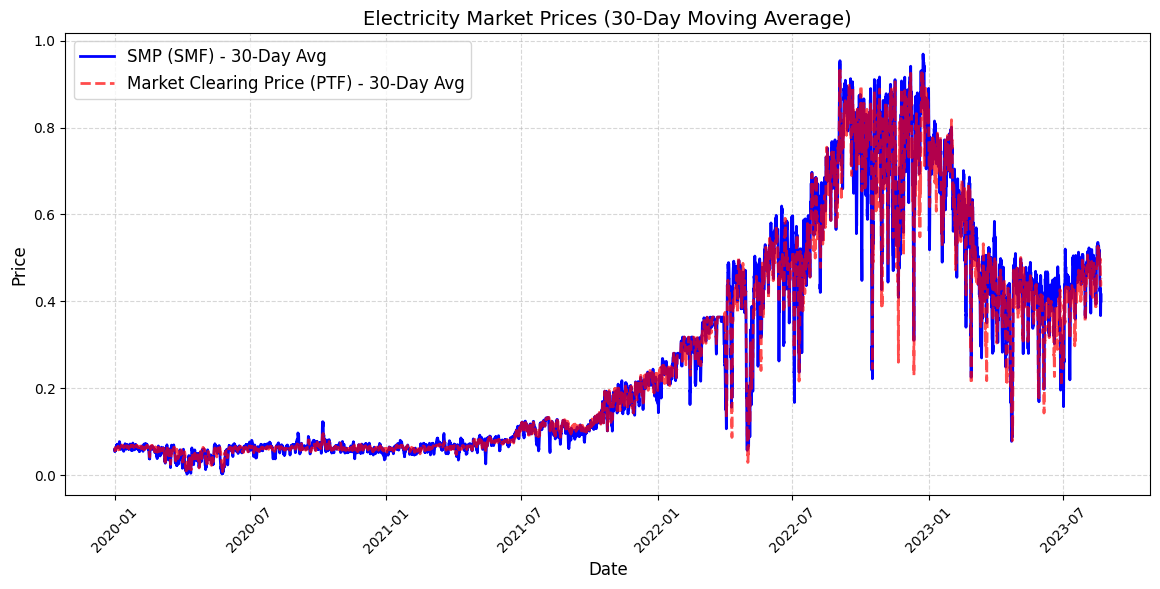

In [14]:
# MONTHLY MOVING AVERAGE
# Load dataset
df = pd.read_csv("../data/processed/smfdb_cleaned.csv", parse_dates=["Tarih"])

# Convert 'Tarih' to datetime and set as index
df["Tarih"] = pd.to_datetime(df["Tarih"])
df.set_index("Tarih", inplace=True)

# Apply a 30-day moving average for a smoother trend
df["Smf_30Day_Avg"] = df["Smf"].rolling(window=30).mean()
df["Ptf_30Day_Avg"] = df["Ptf"].rolling(window=30).mean()

# Filter data to show only from 2020 onward
df_filtered = df[df.index >= "2020-01-01"]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_filtered.index, df_filtered["Smf_30Day_Avg"], label="SMP (SMF) - 30-Day Avg", color="blue", linestyle="-", linewidth=2)
plt.plot(df_filtered.index, df_filtered["Ptf_30Day_Avg"], label="Market Clearing Price (PTF) - 30-Day Avg", color="red", linestyle="--", linewidth=2, alpha=0.7)

# Formatting
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Electricity Market Prices (30-Day Moving Average)", fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

 **Multivariate Analysis (Correlation)**

Correlation Heatmap

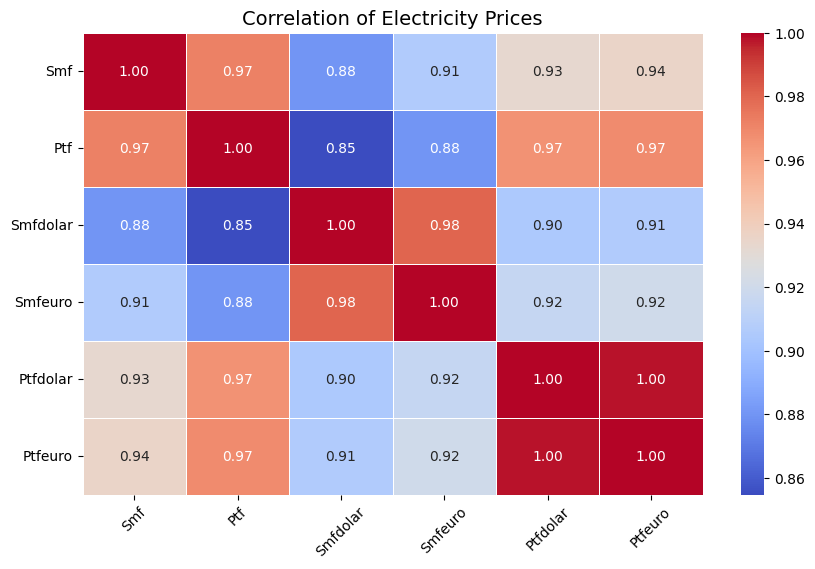

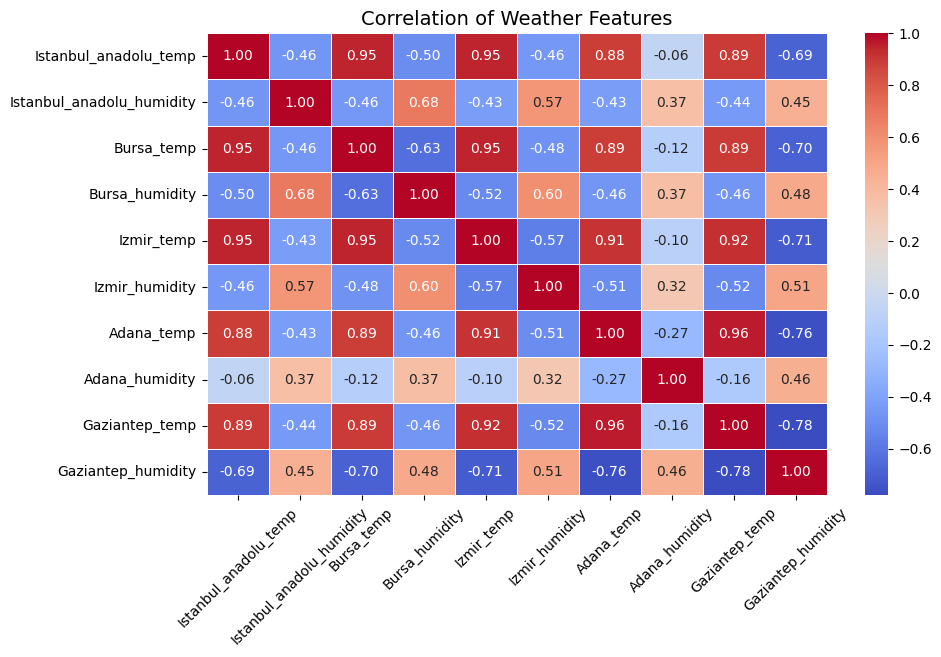

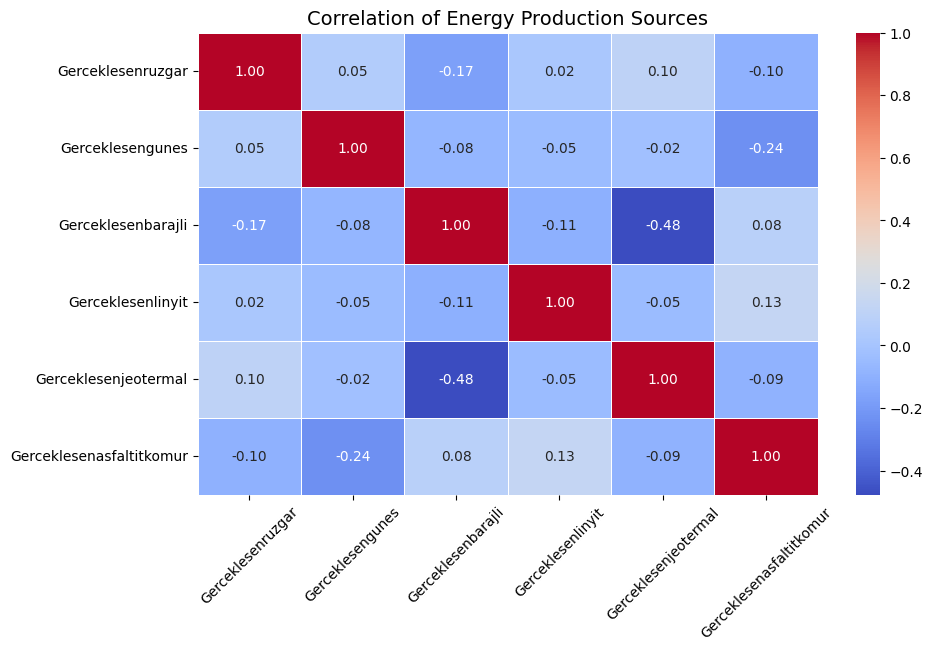

In [21]:
# Load dataset
df = pd.read_csv("../data/processed/smfdb_cleaned.csv")

# Convert 'Tarih' to datetime and set as index
df["Tarih"] = pd.to_datetime(df["Tarih"])
df.set_index("Tarih", inplace=True)

# Compute correlation matrix
correlation_matrix = df.corr()

# Define groups of related features
price_features = ["Smf", "Ptf", "Smfdolar", "Smfeuro", "Ptfdolar", "Ptfeuro"]
weather_features = ["Istanbul_anadolu_temp", "Istanbul_anadolu_humidity",
                    "Bursa_temp", "Bursa_humidity",
                    "Izmir_temp", "Izmir_humidity",
                    "Adana_temp", "Adana_humidity",
                    "Gaziantep_temp", "Gaziantep_humidity"]
energy_production_features = ["Gerceklesenruzgar", "Gerceklesengunes",
                              "Gerceklesenbarajli", "Gerceklesenlinyit",
                              "Gerceklesenjeotermal", "Gerceklesenasfaltitkomur"]

# Function to create heatmap
def plot_heatmap(feature_list, title):
    plt.figure(figsize=(10,6))
    sns.heatmap(df[feature_list].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Plot separate heatmaps
plot_heatmap(price_features, "Correlation of Electricity Prices")
plot_heatmap(weather_features, "Correlation of Weather Features")
plot_heatmap(energy_production_features, "Correlation of Energy Production Sources")


Boxplot for Outlier Detection

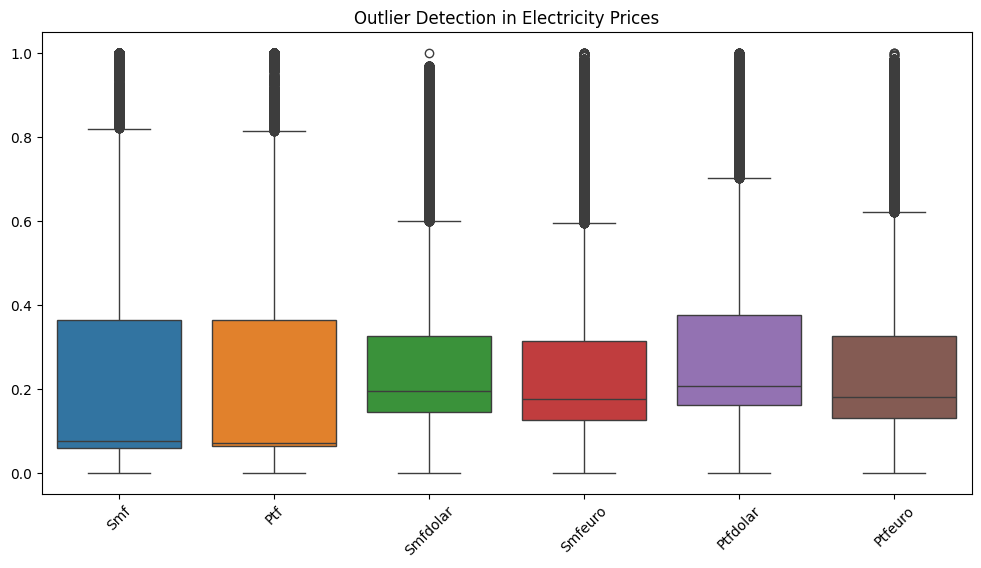

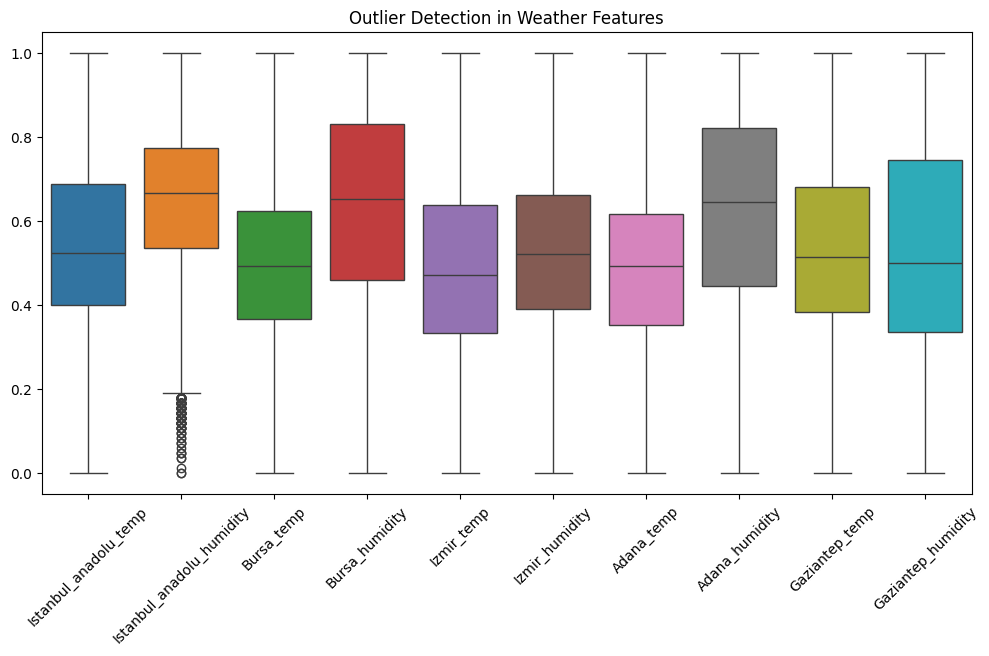

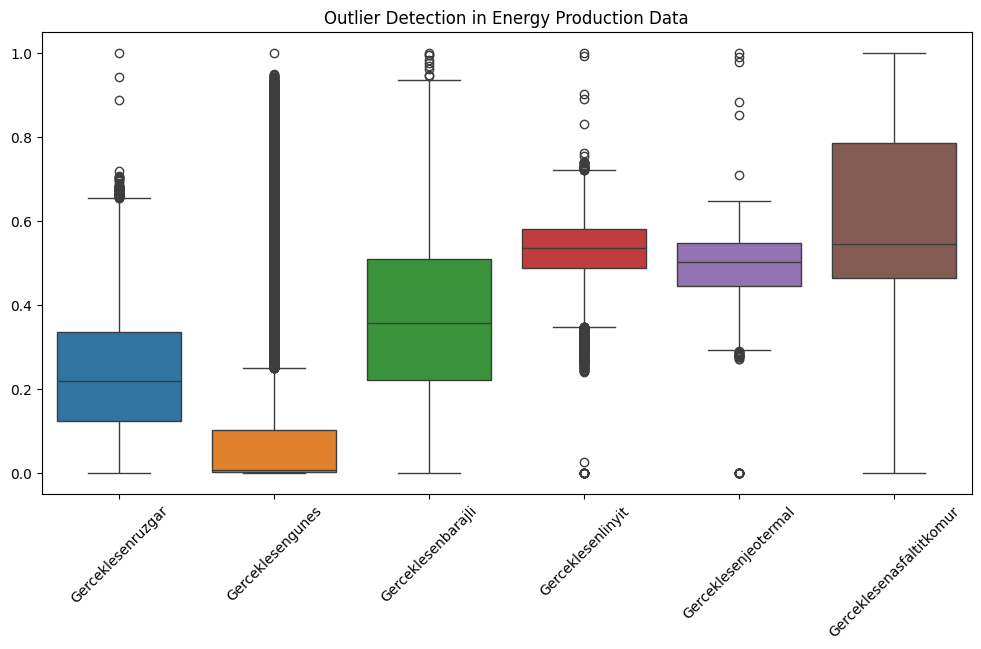

In [18]:
# Load dataset
df = pd.read_csv("../data/processed/smfdb_final.csv")

# Define feature groups
price_features = ["Smf", "Ptf", "Smfdolar", "Smfeuro", "Ptfdolar", "Ptfeuro"]
weather_features = ["Istanbul_anadolu_temp", "Istanbul_anadolu_humidity",
                    "Bursa_temp", "Bursa_humidity",
                    "Izmir_temp", "Izmir_humidity",
                    "Adana_temp", "Adana_humidity",
                    "Gaziantep_temp", "Gaziantep_humidity"]
energy_features = ["Gerceklesenruzgar", "Gerceklesengunes",
                   "Gerceklesenbarajli", "Gerceklesenlinyit",
                   "Gerceklesenjeotermal", "Gerceklesenasfaltitkomur"]

# Function to plot boxplots
def plot_boxplot(feature_list, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[feature_list])
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

# Plot separate boxplots
plot_boxplot(price_features, "Outlier Detection in Electricity Prices")
plot_boxplot(weather_features, "Outlier Detection in Weather Features")
plot_boxplot(energy_features, "Outlier Detection in Energy Production Data")


**Feature Engineering**

In [63]:
# missing values because it need the data to calculate the correlation
print("Final Missing Values Check:")
print(df.isnull().sum())

Final Missing Values Check:
Tarih                     0
Blokeslesmemiktari        0
Saatlikeslesmemiktari     0
Minalisfiyati             0
Maxalisfiyati             0
                         ..
Smf_Lag7                  7
Smf_Lag30                30
Ptf_Lag1                  1
Ptf_Lag7                  7
Ptf_Lag30                30
Length: 62, dtype: int64


Time-Based Features

In [54]:
df = pd.read_csv("../data/processed/smfdb_final.csv")

df[["Tarih", "Hour", "Day", "Month", "Year", "Weekday", "Is_Weekend", "Season"]]


,Tarih,Hour,Day,Month,Year,Weekday,Is_Weekend,Season
0,2019-01-01 00:00:00,0,1,1,2019,1,0,Winter
1,2019-01-01 01:00:00,1,1,1,2019,1,0,Winter
2,2019-01-01 02:00:00,2,1,1,2019,1,0,Winter
3,2019-01-01 03:00:00,3,1,1,2019,1,0,Winter
4,2019-01-01 04:00:00,4,1,1,2019,1,0,Winter
...,...,...,...,...,...,...,...,...
40620,2023-08-20 20:00:00,20,20,8,2023,6,1,Summer
40621,2023-08-20 21:00:00,21,20,8,2023,6,1,Summer
40622,2023-08-20 22:00:00,22,20,8,2023,6,1,Summer
40623,2023-08-20 23:00:00,23,20,8,2023,6,1,Summer


Display Day/Night Counts

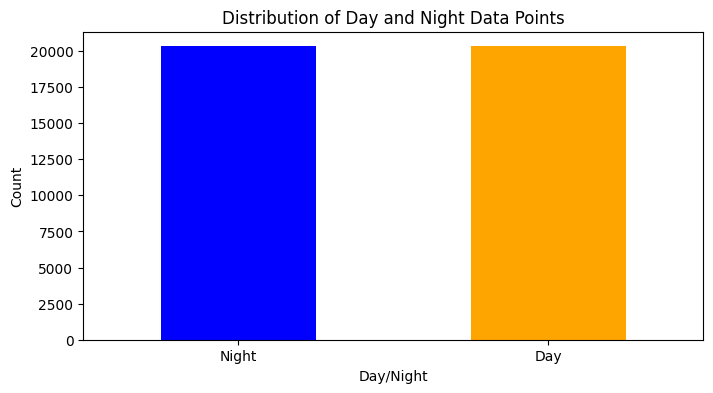

In [55]:
# Count occurrences of Day/Night
df["Day/Night"].value_counts().plot(kind="bar", figsize=(8,4), color=["blue", "orange"])
plt.xticks([0, 1], labels=["Night", "Day"], rotation=0)
plt.title("Distribution of Day and Night Data Points")
plt.ylabel("Count")
plt.show()


Compare SMF Prices During Day & Night

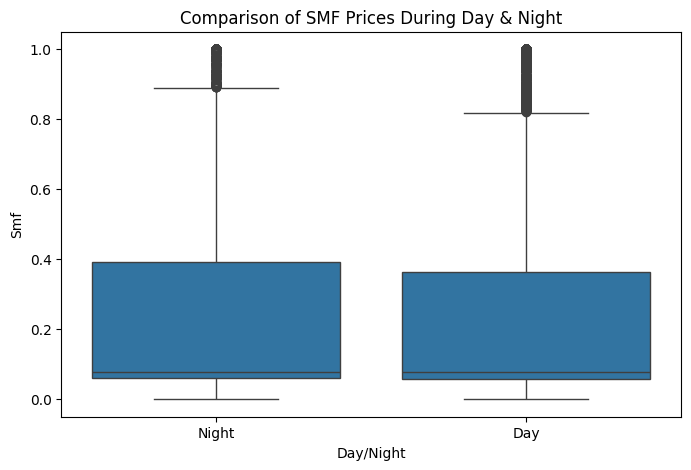

In [56]:
# Boxplot to compare SMF prices during Day & Night
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Day/Night"], y=df["Smf"])
plt.xticks([0, 1], labels=["Night", "Day"])
plt.title("Comparison of SMF Prices During Day & Night")
plt.show()


Rolling Statistics

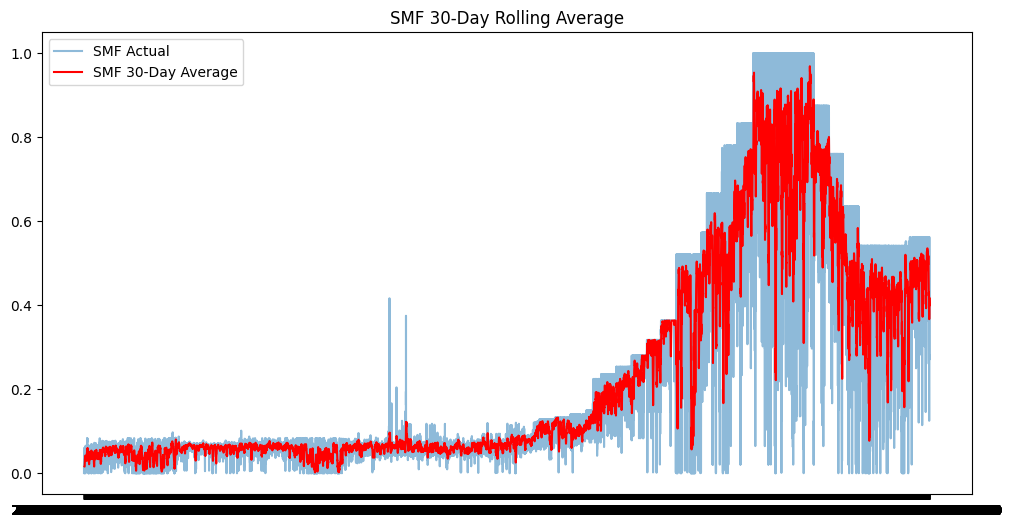

In [19]:
# takes 4 mins to run
df["Smf_30Day_Avg"] = df["Smf"].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df["Tarih"], df["Smf"], label="SMF Actual", alpha=0.5)
plt.plot(df["Tarih"], df["Smf_30Day_Avg"], label="SMF 30-Day Average", color="red")
plt.legend()
plt.title("SMF 30-Day Rolling Average")
plt.show()


Weather-Derived Features

In [108]:
df[["Istanbul_anadolu_temp", "Bursa_temp", "Izmir_temp", "Adana_temp", "Gaziantep_temp"]].describe()


,Istanbul_anadolu_temp,Bursa_temp,Izmir_temp,Adana_temp,Gaziantep_temp
count,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000
mean,0.536734,0.493835,0.482638,0.488419,0.534650
std,0.170374,0.161078,0.189401,0.162477,0.181449
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.366355,0.334118,0.352823,0.384615
50%,0.524444,0.493458,0.472941,0.493952,0.515734
75%,0.688889,0.624299,0.637647,0.616935,0.681818
max,1.000000,1.000000,1.000000,1.000000,1.000000


Economic indicators

In [ ]:
# Select economic indicators
economic_features = ["Dolar", "Euro", "Ptfdolar", "Ptfeuro", "Smfdolar", "Smfeuro"]

# Describe statistics
df[economic_features].describe()

,Dolar,Euro,Ptfdolar,Ptfeuro,Smfdolar,Smfeuro
count,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000,40625.000000
mean,0.410906,0.405991,0.292417,0.261114,0.268600,0.250738
std,0.217594,0.202010,0.207611,0.200148,0.213139,0.210030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.226081,0.227228,0.160541,0.131466,0.144006,0.126606
50%,0.305874,0.326267,0.208048,0.181497,0.194406,0.175422
75%,0.635390,0.586618,0.376992,0.327173,0.325894,0.313772
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


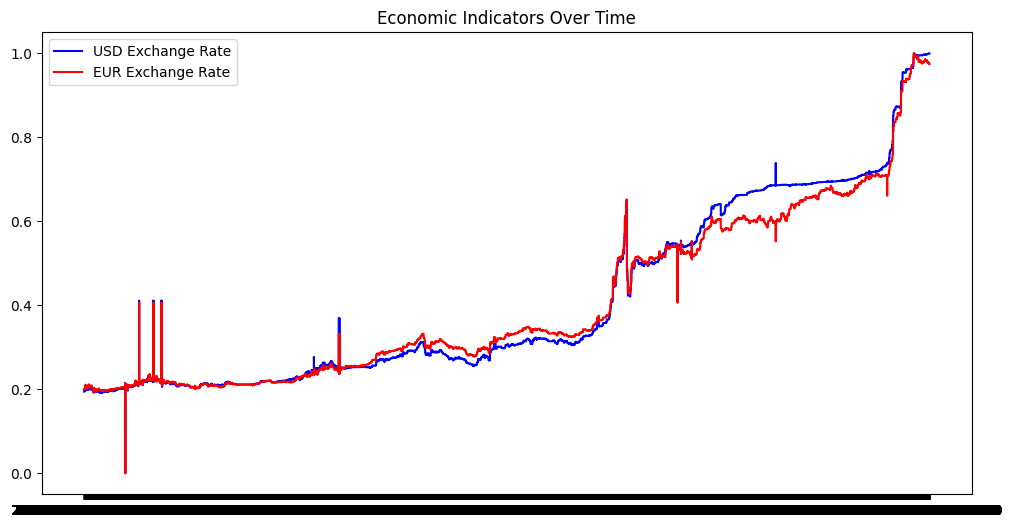

In [ ]:
# takes 4 mins to run
df = pd.read_csv("../data/processed/smfdb_final.csv")
# Plot economic indicators over time
plt.figure(figsize=(12,6))
plt.plot(df["Tarih"], df["Dolar"], label="USD Exchange Rate", color="blue")
plt.plot(df["Tarih"], df["Euro"], label="EUR Exchange Rate", color="red")
plt.legend()
plt.title("Economic Indicators Over Time")
plt.show()


**Feature Selection**

mRMR Feature

In [24]:
from skfeature.function.information_theoretical_based import MRMR

# Drop non-numeric and target columns
feature_cols = df.select_dtypes(include=["float64", "int64"]).columns.difference(["Smf", "Ptf"])
X = df[feature_cols]
y = df["Smf"]

# Apply mRMR Feature Selection
selected_features = MRMR.mrmr(X.values, y.values, n_selected_features=10)
selected_feature_names = [feature_cols[i] for i in selected_features]

print("Top 10 Features from mRMR:", selected_feature_names)


Top 10 Features from mRMR: ['Arzislemhacmi', 'Izmir_temp', 'Talepislemhacmi', 'Bursa_humidity', 'Day/Night', 'Blokeslesmemiktari', 'Mineslesmefiyati', 'Adana_humidity', 'Month', 'Istanbul_avrupa_temp', 'Gerceklesennafta', 'Day', 'Gerceklesenasfaltitkomur', 'Gerceklesenakarsu', 'Smfeuro', 'Gaziantep_temp', 'Bursa_temp', 'Dolar', 'Istanbul_anadolu_temp', 'Gerceklesenfueloil', 'Ptf_Lag7', 'Gerceklesentoplam', 'Gerceklesenlng', 'Hour', 'Ptf_Lag30', 'Maxeslesmefiyati', 'Year', 'Minalisfiyati', 'Izmir_humidity', 'Gerceklesenuluslararasi', 'Gerceklesenithalkomur', 'Gerceklesendogalgaz', 'Gerceklesenjeotermal', 'Gerceklesenbiyokutle', 'Minsatisfiyati', 'Maxsatisfiyati', 'Gerceklesenbarajli', 'Gerceklesengunes', 'Smfdolar', 'Weekday', 'Ptfdolar', 'Maxalisfiyati', 'Saatlikeslesmemiktari', 'Smf_Lag7', 'Gaziantep_humidity', 'Smf_Lag30', 'Gerceklesenruzgar', 'Euro', 'Ptf_Lag1', 'Adana_temp', 'Mevsim', 'Ptfeuro', 'Gerceklesenlinyit', 'Istanbul_anadolu_humidity', 'Istanbul_avrupa_humidity', 'Gercekle

Correlation Analysis

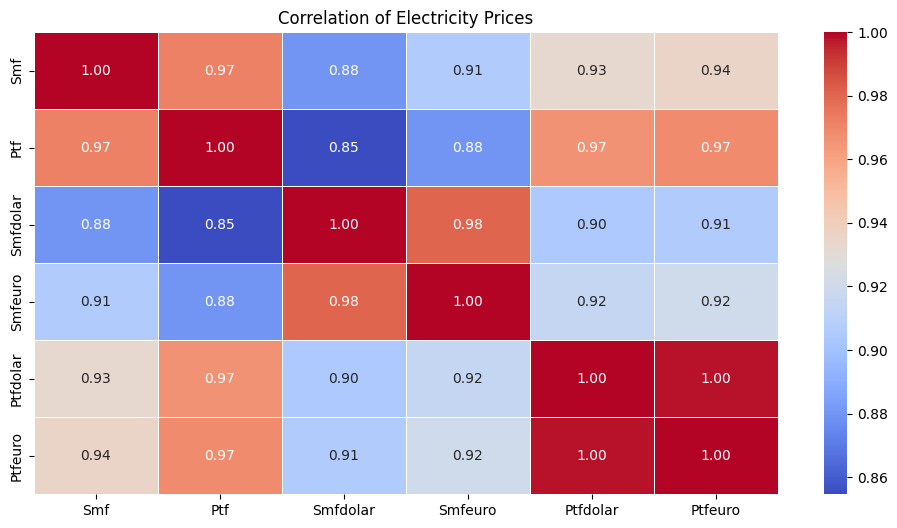

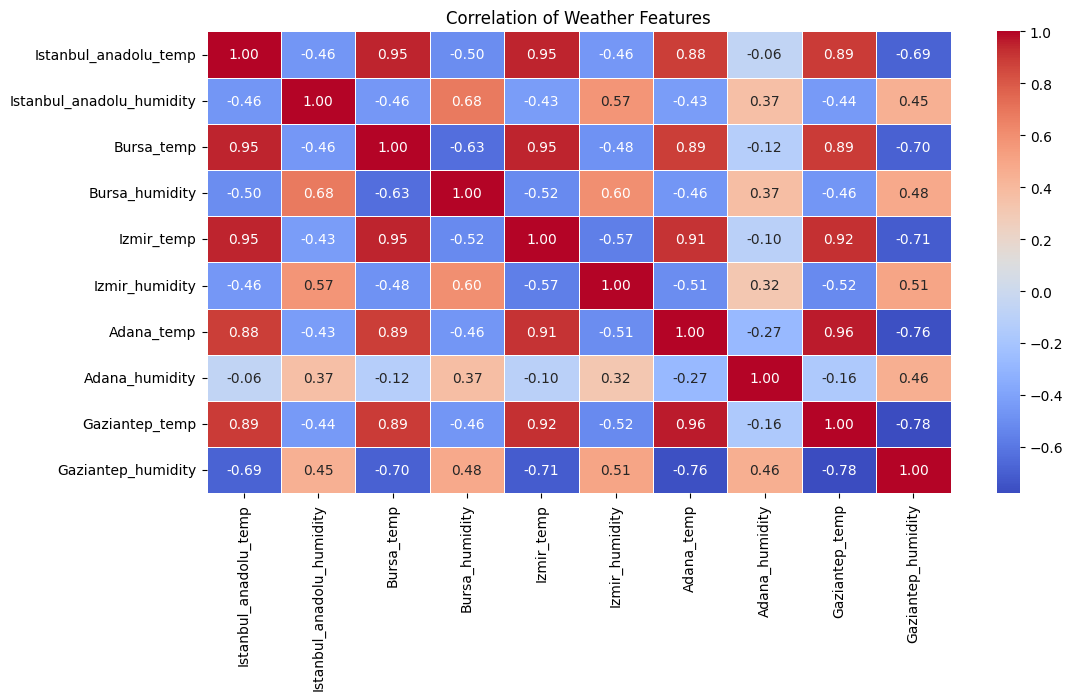

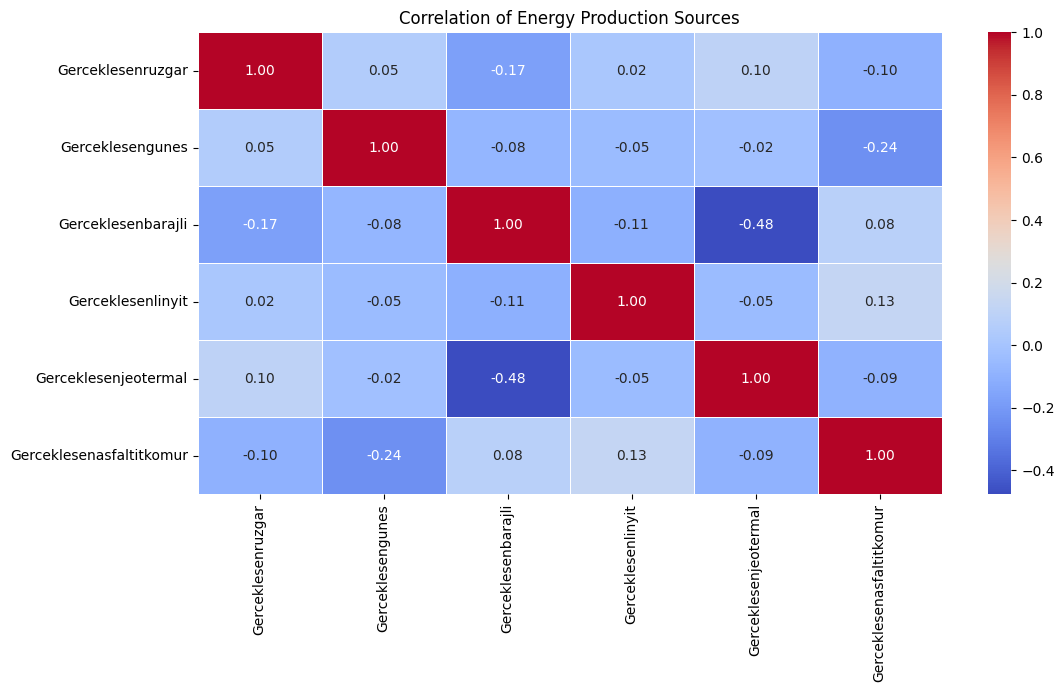

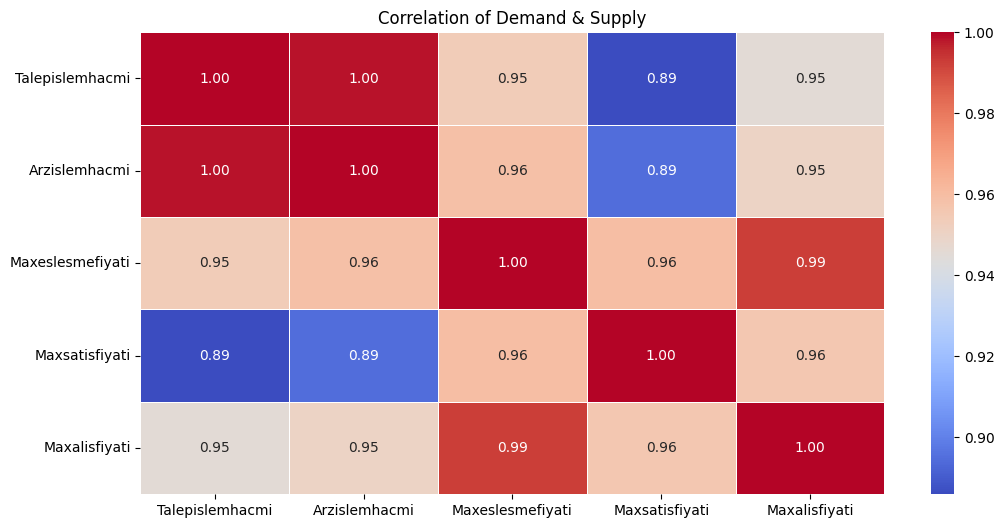

In [58]:
def plot_correlation_heatmap(df, feature_group, title):
    """Plots a heatmap for a specific feature group."""
    plt.figure(figsize=(12, 6))
    sns.heatmap(df[feature_group].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(title)
    plt.show()

# Load the dataset
df = pd.read_csv("../data/processed/smfdb_final.csv")

# Convert 'Tarih' to datetime (if exists)
if "Tarih" in df.columns:
    df["Tarih"] = pd.to_datetime(df["Tarih"])

# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Define feature groups
price_features = ["Smf", "Ptf", "Smfdolar", "Smfeuro", "Ptfdolar", "Ptfeuro"]
weather_features = ["Istanbul_anadolu_temp", "Istanbul_anadolu_humidity", "Bursa_temp", "Bursa_humidity", "Izmir_temp", "Izmir_humidity", "Adana_temp", "Adana_humidity", "Gaziantep_temp", "Gaziantep_humidity"]
energy_production_features = ["Gerceklesenruzgar", "Gerceklesengunes", "Gerceklesenbarajli", "Gerceklesenlinyit", "Gerceklesenjeotermal", "Gerceklesenasfaltitkomur"]

data_demand_supply = ["Talepislemhacmi", "Arzislemhacmi", "Maxeslesmefiyati", "Maxsatisfiyati", "Maxalisfiyati"]

# Plot separate heatmaps
plot_correlation_heatmap(numeric_df, price_features, "Correlation of Electricity Prices")
plot_correlation_heatmap(numeric_df, weather_features, "Correlation of Weather Features")
plot_correlation_heatmap(numeric_df, energy_production_features, "Correlation of Energy Production Sources")
plot_correlation_heatmap(numeric_df, data_demand_supply, "Correlation of Demand & Supply")


Feature Importance (Random Forest)

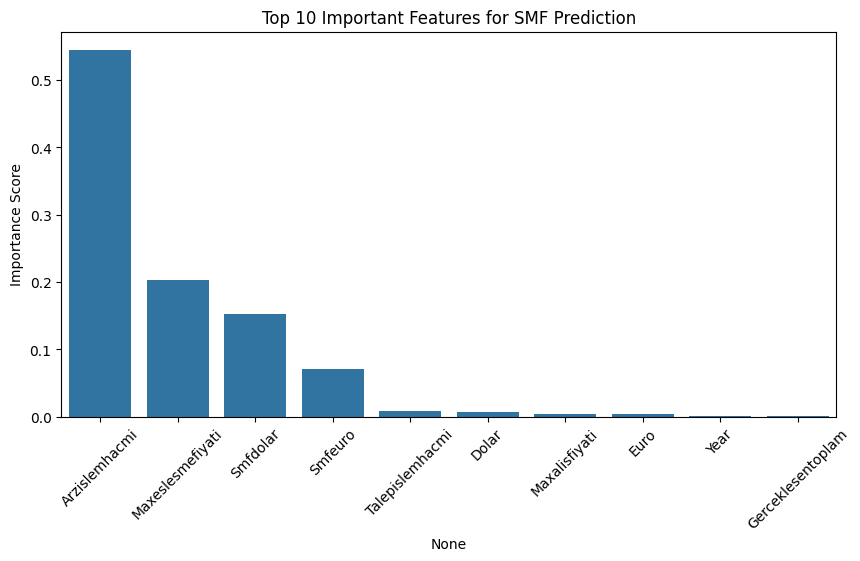

In [ ]:
# Load feature importance results
feature_importance = pd.read_csv("../data/processed/feature_importance.csv", index_col=0)

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance.index[:10], y=feature_importance.iloc[:,0][:10])
plt.xticks(rotation=45)
plt.title("Top 10 Important Features for SMF Prediction")
plt.ylabel("Importance Score")
plt.show()



Lag Features Analysis

In [111]:
df[["Day","Month", "Year", "Hour", "Smf", "Smf_Lag1", "Smf_Lag7", "Smf_Lag30", "Ptf", "Ptf_Lag1", "Ptf_Lag7", "Ptf_Lag30"]]

,Day,Month,Year,Hour,Smf,Smf_Lag1,Smf_Lag7,Smf_Lag30,Ptf,Ptf_Lag1,Ptf_Lag7,Ptf_Lag30
0,1,1,2019,0,0.001042,NaN,NaN,NaN,0.020913,NaN,NaN,NaN
1,1,1,2019,1,0.019800,0.001042,NaN,NaN,0.020150,0.020913,NaN,NaN
2,1,1,2019,2,0.016583,0.019800,NaN,NaN,0.017000,0.020150,NaN,NaN
3,1,1,2019,3,0.000000,0.016583,NaN,NaN,0.008037,0.017000,NaN,NaN
4,1,1,2019,4,0.000000,0.000000,NaN,NaN,0.002400,0.008037,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
40620,20,8,2023,20,0.562500,0.562500,0.187500,0.281458,0.562500,0.562500,0.332833,0.471250
40621,20,8,2023,21,0.562500,0.562500,0.416667,0.354167,0.562500,0.562500,0.416665,0.459792
40622,20,8,2023,22,0.281458,0.562500,0.416667,0.356373,0.500196,0.562500,0.383333,0.460540
40623,20,8,2023,23,0.270833,0.281458,0.343727,0.448331,0.463504,0.500196,0.343727,0.531248


In [60]:
# Load the final dataset
df = pd.read_csv("../data/processed/smfdb_final.csv")

# Show column names
print(df.columns)


Index(['Tarih', 'Blokeslesmemiktari', 'Saatlikeslesmemiktari', 'Minalisfiyati',
       'Maxalisfiyati', 'Minsatisfiyati', 'Maxsatisfiyati', 'Mineslesmefiyati',
       'Maxeslesmefiyati', 'Talepislemhacmi', 'Arzislemhacmi',
       'Gerceklesendogalgaz', 'Gerceklesenbarajli', 'Gerceklesenlinyit',
       'Gerceklesenakarsu', 'Gerceklesenithalkomur', 'Gerceklesenruzgar',
       'Gerceklesengunes', 'Gerceklesenfueloil', 'Gerceklesenjeotermal',
       'Gerceklesenasfaltitkomur', 'Gerceklesentaskomur',
       'Gerceklesenbiyokutle', 'Gerceklesennafta', 'Gerceklesenlng',
       'Gerceklesenuluslararasi', 'Gerceklesentoplam', 'Smf', 'Ptf',
       'Ptfdolar', 'Ptfeuro', 'Dolar', 'Euro', 'Smfdolar', 'Smfeuro',
       'Istanbul_anadolu_temp', 'Istanbul_anadolu_humidity',
       'Istanbul_avrupa_temp', 'Istanbul_avrupa_humidity', 'Bursa_temp',
       'Bursa_humidity', 'Izmir_temp', 'Izmir_humidity', 'Adana_temp',
       'Adana_humidity', 'Gaziantep_temp', 'Gaziantep_humidity', 'Day/Night',
       '